In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df= pd.read_csv("AAPL.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


 **Open Price:**


*   The Open Price is the price at which a financial asset (e.g., a stock or a commodity) starts trading at the beginning of a trading session or a specified time period, such as the opening of a market on a particular day.
*   It represents the first transaction or trade price of the asset when the market opens.


**High Price:**

* The High Price is the highest price at which an asset traded during a specific time period, typically within a trading session (e.g., a day, a week, or a month).
* It provides information about the highest level the asset's price reached during that period.

**Low Price:**

* The Low Price is the lowest price at which an asset traded during a specific time period, like a trading session or a designated timeframe.
* It indicates the lowest level the asset's price reached during that period.

**Close Price:**

* The Close Price is the final price at which an asset traded at the end of a specific time period, often the closing of a trading session (e.g., the closing price of a stock at the end of a trading day).
* It represents the last transaction or trade price before the market or trading session closes.

**Adj Close Price (Adjusted Close Price):**

* The Adjusted Close Price is the closing price of an asset adjusted for factors that can affect the price but are not related to its actual performance, such as stock splits, dividends, or other corporate actions.
* This adjusted price is useful for tracking the true investment return because it accounts for changes in the asset's value that are not due to market performance.

**Volume:**

* Volume refers to the total number of shares, contracts, or units of an asset that have been traded during a specific time period.
* It is a measure of the liquidity and trading activity of the asset. High volume typically indicates strong investor interest, while low volume can suggest limited interest or liquidity.

In [3]:
df.shape

(1510, 7)

In [4]:
df.describe()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,157.978552,159.539694,156.544346,158.115756,152.312201,3.838967e+07
std,56.184602,57.034062,55.603048,56.412547,58.609623,1.950338e+07
min,87.982857,89.408569,87.947144,89.144287,80.739334,1.136200e+07
25%,111.967497,112.857502,110.614999,112.017502,104.381134,2.515898e+07
50%,145.315002,146.720001,144.325005,145.780006,139.728653,3.339445e+07
75%,189.650001,191.377503,187.724998,190.017494,185.526695,4.646998e+07
max,324.739990,327.850006,323.350006,327.200012,326.316681,1.898463e+08


<ipython-input-5-272af271073c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


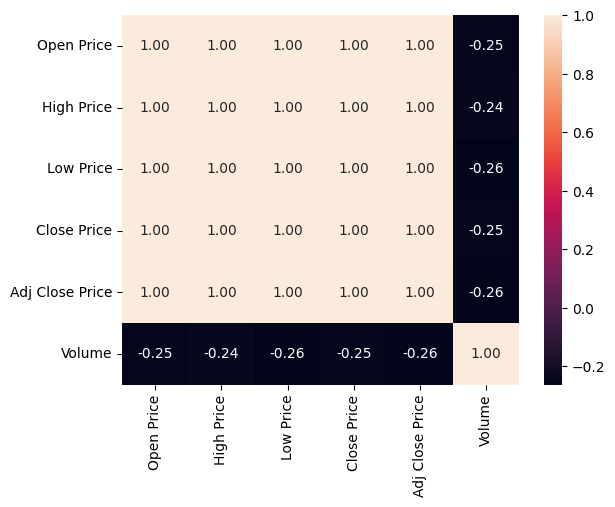

In [5]:
correlation=df.corr()
sns.heatmap(correlation, cbar= True , annot = True , fmt = ".2f")
plt.show()

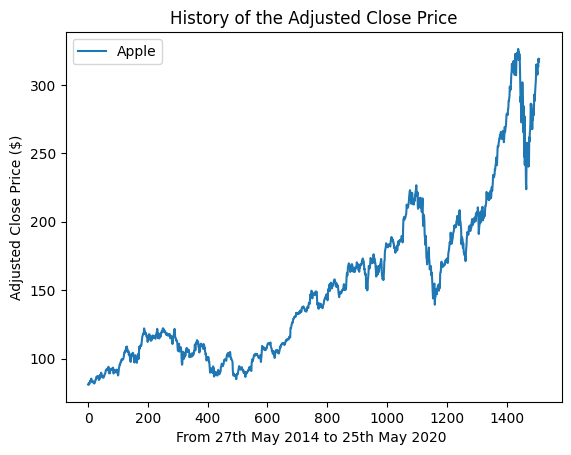

In [6]:
plt.plot(df['Adj Close Price'], label='Apple')
plt.title('History of the Adjusted Close Price')
plt.xlabel("From 27th May 2014 to 25th May 2020 ")
plt.ylabel("Adjusted Close Price ($)")
plt.legend()
plt.show()

 The SMA (Simple Moving Average) is a technical indicator used to calculate the average price of an asset (here the Apple's stock price), over a specified time period. Here's a function that takes the original DataFrame and the window size for the SMA and returns a pandas Series containing the SMA values:

In [7]:
def create_SMA(data, w):
  SMA=pd.DataFrame()
  SMA["Adj Close Price"]=data["Adj Close Price"].rolling(window=w).mean()
  return SMA

In [8]:
SMA20=create_SMA(df, 20)
SMA20

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,294.812523
1506,297.087250
1507,299.281020
1508,301.409145


In [9]:
SMA100=create_SMA(df, 100)
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


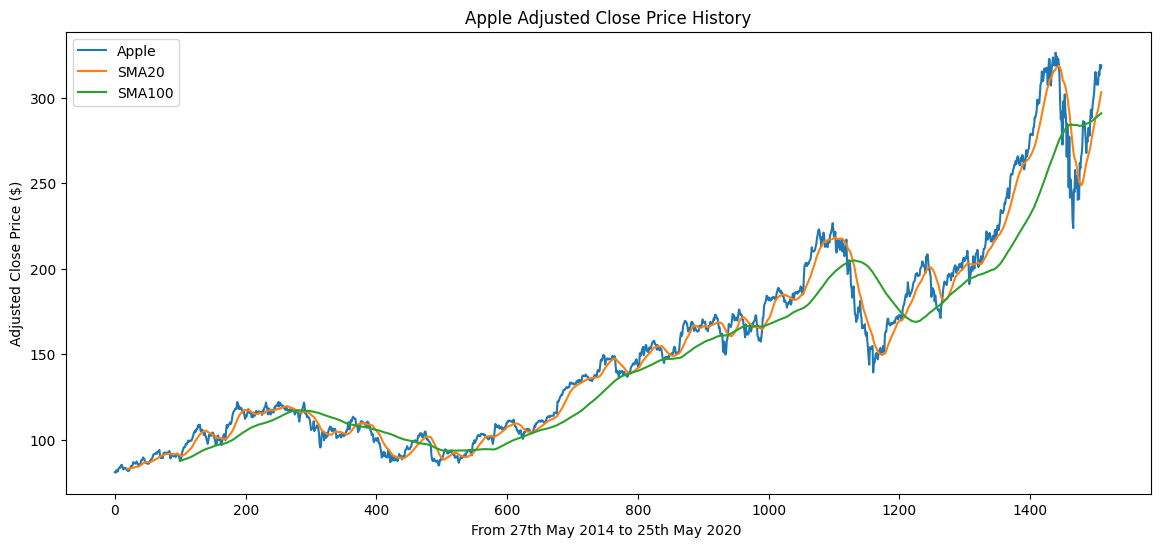

In [10]:
plt.figure(figsize=(14,6))
plt.plot(df['Adj Close Price'], label='Apple')
plt.plot(SMA20['Adj Close Price'], label='SMA20')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title("Apple Adjusted Close Price History")
plt.xlabel("From 27th May 2014 to 25th May 2020 ")
plt.ylabel("Adjusted Close Price ($)")
plt.legend()
plt.show()

In [11]:
dft=pd.DataFrame()
dft["Apple"]=df["Adj Close Price"]
dft["SMA20"]=SMA20["Adj Close Price"]
dft["SMA100"]=SMA100["Adj Close Price"]

In [12]:
print(dft)

           Apple       SMA20      SMA100
0      80.948952         NaN         NaN
1      80.739334         NaN         NaN
2      82.210480         NaN         NaN
3      81.902557         NaN         NaN
4      81.339699         NaN         NaN
...          ...         ...         ...
1505  314.959991  294.812523  289.734840
1506  313.140015  297.087250  290.037927
1507  319.230011  299.281020  290.345799
1508  316.850006  301.409145  290.630966
1509  318.890015  303.243341  290.919420

[1510 rows x 3 columns]


Here is a simple logic behind the function that needs to be implemented:

**Buy Signal:**

* When the 20-day SMA crosses above the 100-day SMA, it's often interpreted as a bullish signal. This means that, on average, the short-term price trend (20 days) is stronger or more positive than the long-term trend (100 days).
* In this case, the trading function generates a "Buy" signal, indicating that you should consider buying the asset. The code appends the current price of the asset to the SignalBuy list and sets the SignalSell value to np.nan (a placeholder for "no action").

**Sell Signal:**

* Conversely, when the 20-day SMA crosses below the 100-day SMA, it's often seen as a bearish signal. This suggests that, on average, the short-term trend is weaker or more negative than the long-term trend.
*In this scenario, the trading function generates a "Sell" signal, indicating that you should consider selling the asset. The code appends the current price of the asset to the SignalSell list and sets the SignalBuy value to np.nan.

**No Action:**

* If neither of the SMA crossover conditions is met, the function appends np.nan to both the SignalBuy and SignalSell lists, signifying that there is no clear buy or sell signal at that point.

In [13]:
def BuySell(data):
    SignalBuy = []
    SignalSell = []
    hold = False

    for i in range(len(data)):
        if data ['SMA20'][i] > data['SMA100'][i]:
            if not hold:
                SignalBuy.append(data['Apple'][i])
                SignalSell.append(np.nan)
                buy_price = data['Apple'][i]
                hold = True
            else:
                SignalBuy.append(np.nan)
                SignalSell.append(np.nan)
        elif data['SMA20'][i] < data['SMA100'][i]:
            if hold:
                SignalBuy.append(np.nan)
                SignalSell.append(data['Apple'][i])
                hold = False
            else:
                SignalBuy.append(np.nan)
                SignalSell.append(np.nan)
        else:
            SignalBuy.append(np.nan)
            SignalSell.append(np.nan)

    return SignalBuy, SignalSell

In [14]:
Buy,Sell=BuySell(dft)

In [15]:
print(dft)

           Apple       SMA20      SMA100
0      80.948952         NaN         NaN
1      80.739334         NaN         NaN
2      82.210480         NaN         NaN
3      81.902557         NaN         NaN
4      81.339699         NaN         NaN
...          ...         ...         ...
1505  314.959991  294.812523  289.734840
1506  313.140015  297.087250  290.037927
1507  319.230011  299.281020  290.345799
1508  316.850006  301.409145  290.630966
1509  318.890015  303.243341  290.919420

[1510 rows x 3 columns]


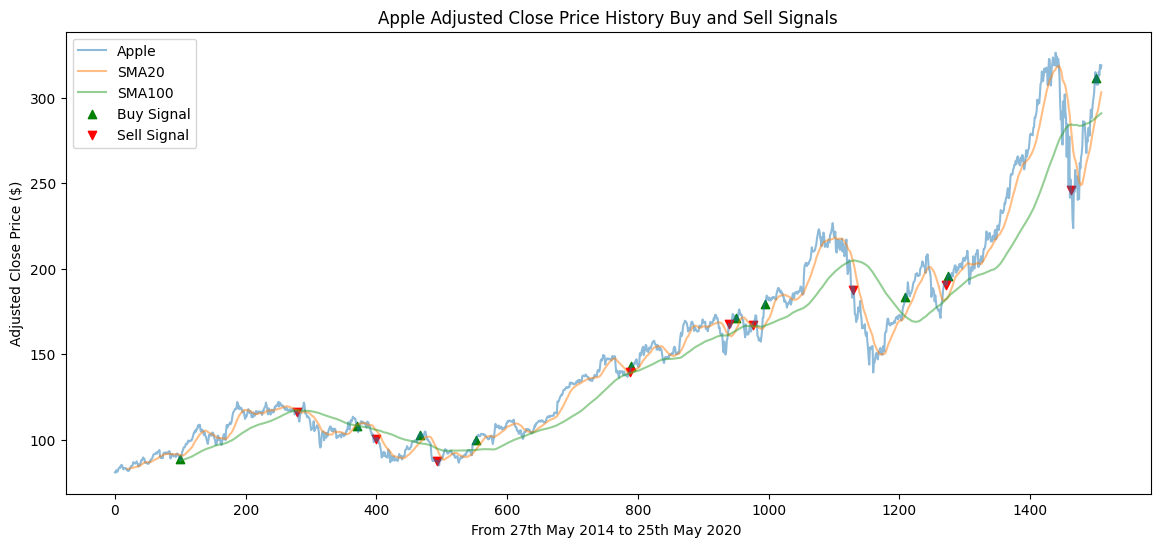

In [16]:
plt.figure(figsize=(14,6))
plt.plot(dft['Apple'], label='Apple', alpha=0.5)
plt.plot(dft['SMA20'], label='SMA20', alpha=0.5)
plt.plot(dft['SMA100'],label='SMA100', alpha=0.5)
plt.scatter(dft.index, Buy, label ='Buy Signal', marker='^',color='green')
plt.scatter(dft.index, Sell,label='Sell Signal', marker='v', color='red')
plt.title('Apple Adjusted Close Price History Buy and Sell Signals')
plt.xlabel("From 27th May 2014 to 25th May 2020 ")
plt.ylabel("Adjusted Close Price ($)")
plt.legend()
plt.show()

In [17]:
Buy2 = [value for value in Buy if not math.isnan(value)]
Sell2 = [value for value in Sell if not math.isnan(value)]

Net_Profit=sum([(Sell2[i]-Buy2[i]) for i in range(len(Sell2))])
print(f"The net profit per one share traded of the Apple's stock if the signals are followed is: {Net_Profit:.2f}$") #(By the last Sell Signal)

The net profit per one share traded of the Apple's stock if the signals are followed is: 130.89$
